### OPEN AN ITALIAN RESTAURANT IN BARCELONA

## Business Problem
The objective of this project is to recommend to an enterpreneur the best location for an ITALIAN restaurant in BARCELONA (SPAIN) given 3 options of loacalization. The recommendation will be given by using Data analysis, and machine learning algorithms like clustering.

## Target Audience
The entrepreneur who wants to find the location to open a reliable Italian restaurant.

## Data
To solve the problem, we need the following data:
List of 3 suggested locations
List of nearby italian restaurants given the 3 locations
List of Barcelona popular avenues close to the locations


## Extracting the data
Using foursquare API:
Retrieve the restaurants by each location
Retrieve Barcelona's most popular avenues
Retrieve Barcelona's Restaurant locations and cluster them by type

## How to use the data
Clustering the venues with or without Italian restaurant using K-means.
Suggest a cluster where might be suitable to place the new successful italian restaurant.



![alt text](https://github.com/Arinca/Training/blob/master/trattoria-anita.jpg?raw=true "logo title text 1")

### Here I develop the code for extracting data

In [4]:
#Import necessary Libraries

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

import matplotlib as mpl
import matplotlib.pyplot as plt


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [7]:
#We retrieve the data from the desired locations
url ='https://raw.githubusercontent.com/Arinca/Training/master/Restaurants.csv'
Restaurants = pd.read_csv(url)
Restaurants.head()

,Restaurant,Latitude,Longitude,Area
0,A,41.382778,2.176944,Barri Gotic
1,B,41.387027,2.170024,Barri de Gràcia
2,C,41.399167,2.203889,Poblenou


In [8]:
address = 'Barcelona'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barcelona are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Barcelona are 41.3828939, 2.1774322.


In [9]:
# create map of New York using latitude and longitude values
map_BCN = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add restaurant markers to the map
for lat, lng, label in zip (Restaurants['Latitude'], Restaurants['Longitude'], Restaurants['Area']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
        fill_opacity=0.8,
    parse_html=False).add_to(map_BCN)


map_BCN

### The Enterpreneu has share the following location options

In [88]:
Restaurants.shape

(3, 4)

In [89]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'Y0NEDLW2W33JEP5234YBVSG1AMNMSEIEW3HRW1JSRX3KFFSZ' # your Foursquare ID
CLIENT_SECRET = 'QS1U02EPNO0QHGOOBQ0ZYVDZK3BVGC3PUZSLZ55AKDF14NTY' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y0NEDLW2W33JEP5234YBVSG1AMNMSEIEW3HRW1JSRX3KFFSZ
CLIENT_SECRET:QS1U02EPNO0QHGOOBQ0ZYVDZK3BVGC3PUZSLZ55AKDF14NTY


In [90]:
#Look for restaurants nearby each location using FourSquare
#Let's create a function to repeat the same process
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [91]:
BCN_venues = getNearbyVenues(names=Restaurants['Area'],latitudes = Restaurants['Latitude'], longitudes = Restaurants['Longitude'])
print (BCN_venues.shape)
BCN_venues


Barri Gotic
Barri de Gràcia
Poblenou
(90, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barri Gotic,41.382778,2.176944,Barrio Gótico,41.383660,2.177290,Neighborhood
1,Barri Gotic,41.382778,2.176944,Gelaaati! di Marco,41.383186,2.177369,Ice Cream Shop
2,Barri Gotic,41.382778,2.176944,Be Chocolat,41.382597,2.174725,Dessert Shop
3,Barri Gotic,41.382778,2.176944,La Colmena,41.383947,2.178523,Dessert Shop
4,Barri Gotic,41.382778,2.176944,Pont del Carrer del Bisbe,41.383310,2.176413,Bridge
...,...,...,...,...,...,...,...
85,Poblenou,41.399167,2.203889,Racó del Taulat,41.399551,2.205854,Mediterranean Restaurant
86,Poblenou,41.399167,2.203889,Casino l'Aliança del Poble Nou,41.399937,2.203437,Cultural Center
87,Poblenou,41.399167,2.203889,Lugaris Beach,41.398819,2.207490,Hotel
88,Poblenou,41.399167,2.203889,Bonpreu,41.400912,2.202807,Fruit & Vegetable Store


In [92]:
#Let's check how many categories per Area defined:
BCN_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barri Gotic,30,30,30,30,30,30
Barri de Gràcia,30,30,30,30,30,30
Poblenou,30,30,30,30,30,30


In [93]:
# one hot encoding
BCN_onehot = pd.get_dummies(BCN_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BCN_onehot['Neighborhood'] = BCN_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [BCN_onehot.columns[-1]] + list(BCN_onehot.columns[:-1])
BCN_onehot = BCN_onehot[fixed_columns]

BCN_onehot.head()

,Wine Bar,Art Gallery,Asian Restaurant,Baby Store,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Bookstore,...,Pizza Place,Plaza,Record Shop,Road,Sandwich Place,Spanish Restaurant,Sporting Goods Shop,Supermarket,Tapas Restaurant,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
BCN_group = BCN_onehot.groupby('Neighborhood').mean().reset_index()
BCN_group

,Neighborhood,Wine Bar,Art Gallery,Asian Restaurant,Baby Store,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,...,Pizza Place,Plaza,Record Shop,Road,Sandwich Place,Spanish Restaurant,Sporting Goods Shop,Supermarket,Tapas Restaurant,Vegetarian / Vegan Restaurant
0,Barri Gotic,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.033333,0.166667,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.066667,0.000000
1,Barri de Gràcia,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066667,0.033333,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333
2,Poblenou,0.033333,0.000000,0.033333,0.000000,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.000000,0.033333,0.000000,0.033333,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333


In [130]:
#### Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 15

for hood in BCN_group['Neighborhood']:
    print("----"+hood+"----")
    temp = BCN_group[BCN_group['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')





----Barri Gotic----
                 venue  freq
0                Plaza  0.17
1       Ice Cream Shop  0.10
2     Tapas Restaurant  0.07
3         Dessert Shop  0.07
4             Wine Bar  0.03
5         Cocktail Bar  0.03
6   Spanish Restaurant  0.03
7          Pizza Place  0.03
8      Organic Grocery  0.03
9   Italian Restaurant  0.03
10               Hotel  0.03
11       Hot Dog Joint  0.03
12    Greek Restaurant  0.03
13         Coffee Shop  0.03
14         Fabric Shop  0.03


----Barri de Gràcia----
                            venue  freq
0                           Hotel  0.27
1                       Bookstore  0.10
2                  Ice Cream Shop  0.07
3                           Plaza  0.07
4   Vegetarian / Vegan Restaurant  0.03
5                  Clothing Store  0.03
6                        Fountain  0.03
7                     Art Gallery  0.03
8               Electronics Store  0.03
9                      Donut Shop  0.03
10             Italian Restaurant  0.03
11        

## Histogram A

In [131]:
BCN_G3=BCN_group
BCN_G3.set_index('Neighborhood', inplace = True)
BCN_G3.head()


,Wine Bar,Art Gallery,Asian Restaurant,Baby Store,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Bookstore,...,Pizza Place,Plaza,Record Shop,Road,Sandwich Place,Spanish Restaurant,Sporting Goods Shop,Supermarket,Tapas Restaurant,Vegetarian / Vegan Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Barri Gotic,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,...,0.033333,0.166667,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.066667,0.000000
Barri de Gràcia,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.000000,0.066667,0.033333,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333
Poblenou,0.033333,0.000000,0.033333,0.000000,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.000000,0.033333,0.000000,0.033333,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333


In [135]:
BCN_ITA=BCN_G3[["Italian Restaurant", "Pizza Place"]]

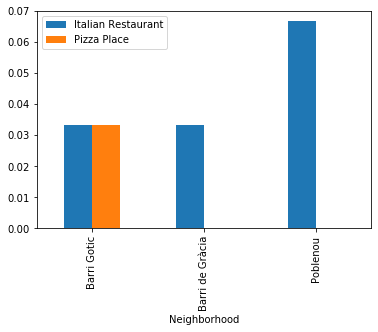

In [138]:
BCN_G3[["Italian Restaurant", "Pizza Place"]].plot(kind='bar')

In [96]:
#FUNCTION TO SORT
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#TOP 10 VENUES
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BCN_group['Neighborhood']

for ind in np.arange(BCN_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BCN_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barri Gotic,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
1,Barri de Gràcia,Hotel,Bookstore,Ice Cream Shop,Plaza,Italian Restaurant,Clothing Store,Donut Shop,Electronics Store,Fountain,Burger Joint
2,Poblenou,Ice Cream Shop,Spanish Restaurant,Italian Restaurant,Mediterranean Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Café,Empanada Restaurant,Cupcake Shop,Cultural Center


### Clustering data


In [97]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


#Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 3

BCN_clustering = BCN_group.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BCN_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 1, 2], dtype=int32)

In [98]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

BCN_merged = BCN_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
BCN_merged = BCN_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

BCN_merged.head() # check the last columns!


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barri Gotic,41.382778,2.176944,Barrio Gótico,41.383660,2.177290,Neighborhood,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
1,Barri Gotic,41.382778,2.176944,Gelaaati! di Marco,41.383186,2.177369,Ice Cream Shop,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
2,Barri Gotic,41.382778,2.176944,Be Chocolat,41.382597,2.174725,Dessert Shop,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
3,Barri Gotic,41.382778,2.176944,La Colmena,41.383947,2.178523,Dessert Shop,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
4,Barri Gotic,41.382778,2.176944,Pont del Carrer del Bisbe,41.383310,2.176413,Bridge,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint


## Finally, let's visualize the resulting clusters

In [99]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BCN_merged['Venue Latitude'], BCN_merged['Venue Longitude'], BCN_merged['Neighborhood'], BCN_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine resulting Clusters

#### Cluster#1 

In [100]:
BCN_merged.loc[BCN_merged['Cluster Labels'] == 0, 
BCN_merged.columns[[1] + list(range(5, BCN_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,41.382778,2.177290,Neighborhood,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
1,41.382778,2.177369,Ice Cream Shop,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
2,41.382778,2.174725,Dessert Shop,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
3,41.382778,2.178523,Dessert Shop,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
4,41.382778,2.176413,Bridge,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
5,41.382778,2.175506,Spanish Restaurant,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
6,41.382778,2.176912,Hot Dog Joint,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
7,41.382778,2.175152,Plaza,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
8,41.382778,2.178297,Wine Bar,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
9,41.382778,2.174488,Ice Cream Shop,0,Plaza,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Fabric Shop,Hotel,Baby Store,Beer Bar,Bridge,Burger Joint
